## Alejandro Pulido Sánchez

In [202]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
from IPython.display import Image, display_png
from scipy.stats import entropy

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> crea un DataFrame de 64 filas y 6 columnas, donde cada fila representa una combinación de 6 bits de números binarios y cada columna representa cada uno de los 6 bits. Cada celda del DataFrame contiene un valor binario de 0 o 1.</div>

In [177]:
data = pd.DataFrame(columns=['a', 'b', 'c', 'd', 'e', 'f'], index=np.arange(64, dtype=int))

for i in range(64):
    b = bin(i)[2:]
    aux=''
    for k in range(6-len(b)):
        aux += '0'
    b = aux + b
    for j in range(6):
        data.iloc[i,j] = b[j]
data

,a,b,c,d,e,f
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
59,1,1,1,0,1,1
60,1,1,1,1,0,0
61,1,1,1,1,0,1
62,1,1,1,1,1,0


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> crea una nueva instancia de DataFrame con la misma estructura y datos que el DataFrame anterior, pero con valores booleanos en lugar de valores enteros. </div>

In [178]:
data = pd.DataFrame(columns=['a', 'b', 'c', 'd', 'e', 'f'], data=np.array(data).astype(int).astype(bool))
data

,a,b,c,d,e,f
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,True,False
3,False,False,False,False,True,True
4,False,False,False,True,False,False
...,...,...,...,...,...,...
59,True,True,True,False,True,True
60,True,True,True,True,False,False
61,True,True,True,True,False,True
62,True,True,True,True,True,False


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> realiza una operación booleana compleja utilizando los valores de las columnas del DataFrame "data" y guarda el resultado en una nueva columna llamada 'funcion'</div>


In [179]:
funcion = ((data.a & data.b) | (~data.c & data.d)) ^ (data.e | ~data.f)
data.insert(loc=len(data.columns), column='funcion', value=np.array(funcion, dtype=bool))
data

,a,b,c,d,e,f,funcion
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,True,False,True
3,False,False,False,False,True,True,True
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
59,True,True,True,False,True,True,False
60,True,True,True,True,False,False,False
61,True,True,True,True,False,True,True
62,True,True,True,True,True,False,False


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> entrena un modelo de árbol de decisión utilizando los datos del DataFrame "data" y lo ajusta para predecir los valores de la variable de respuesta 'funcion'. El modelo utiliza la entropía como medida de impureza para decidir qué atributos dividir en cada nodo.</div>

In [180]:
clf =DecisionTreeClassifier(criterion='entropy')
clf.fit(X=data.iloc[:,:-1], y=data.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> exporta el árbol de decisión entrenado en formato DOT, que puede ser visualizado con herramientas como Graphviz. El archivo de salida "treeDecisionFuncion.dot" contiene información sobre la estructura del árbol de decisión y la forma en que se tomarán las decisiones para predecir los valores de la variable de respuesta 'funcion'.</div>

In [181]:
export_graphviz(clf, out_file="treeDecisionFuncion.dot", feature_names=data.columns[:-1],class_names=True, filled=True)

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> convierte el archivo DOT generado por la función export_graphviz en una imagen PNG para visualizar el árbol de decisión entrenado.</div>

In [182]:
!dot treeDecisionFuncion.dot -Tpng -o arbol_funcion.png

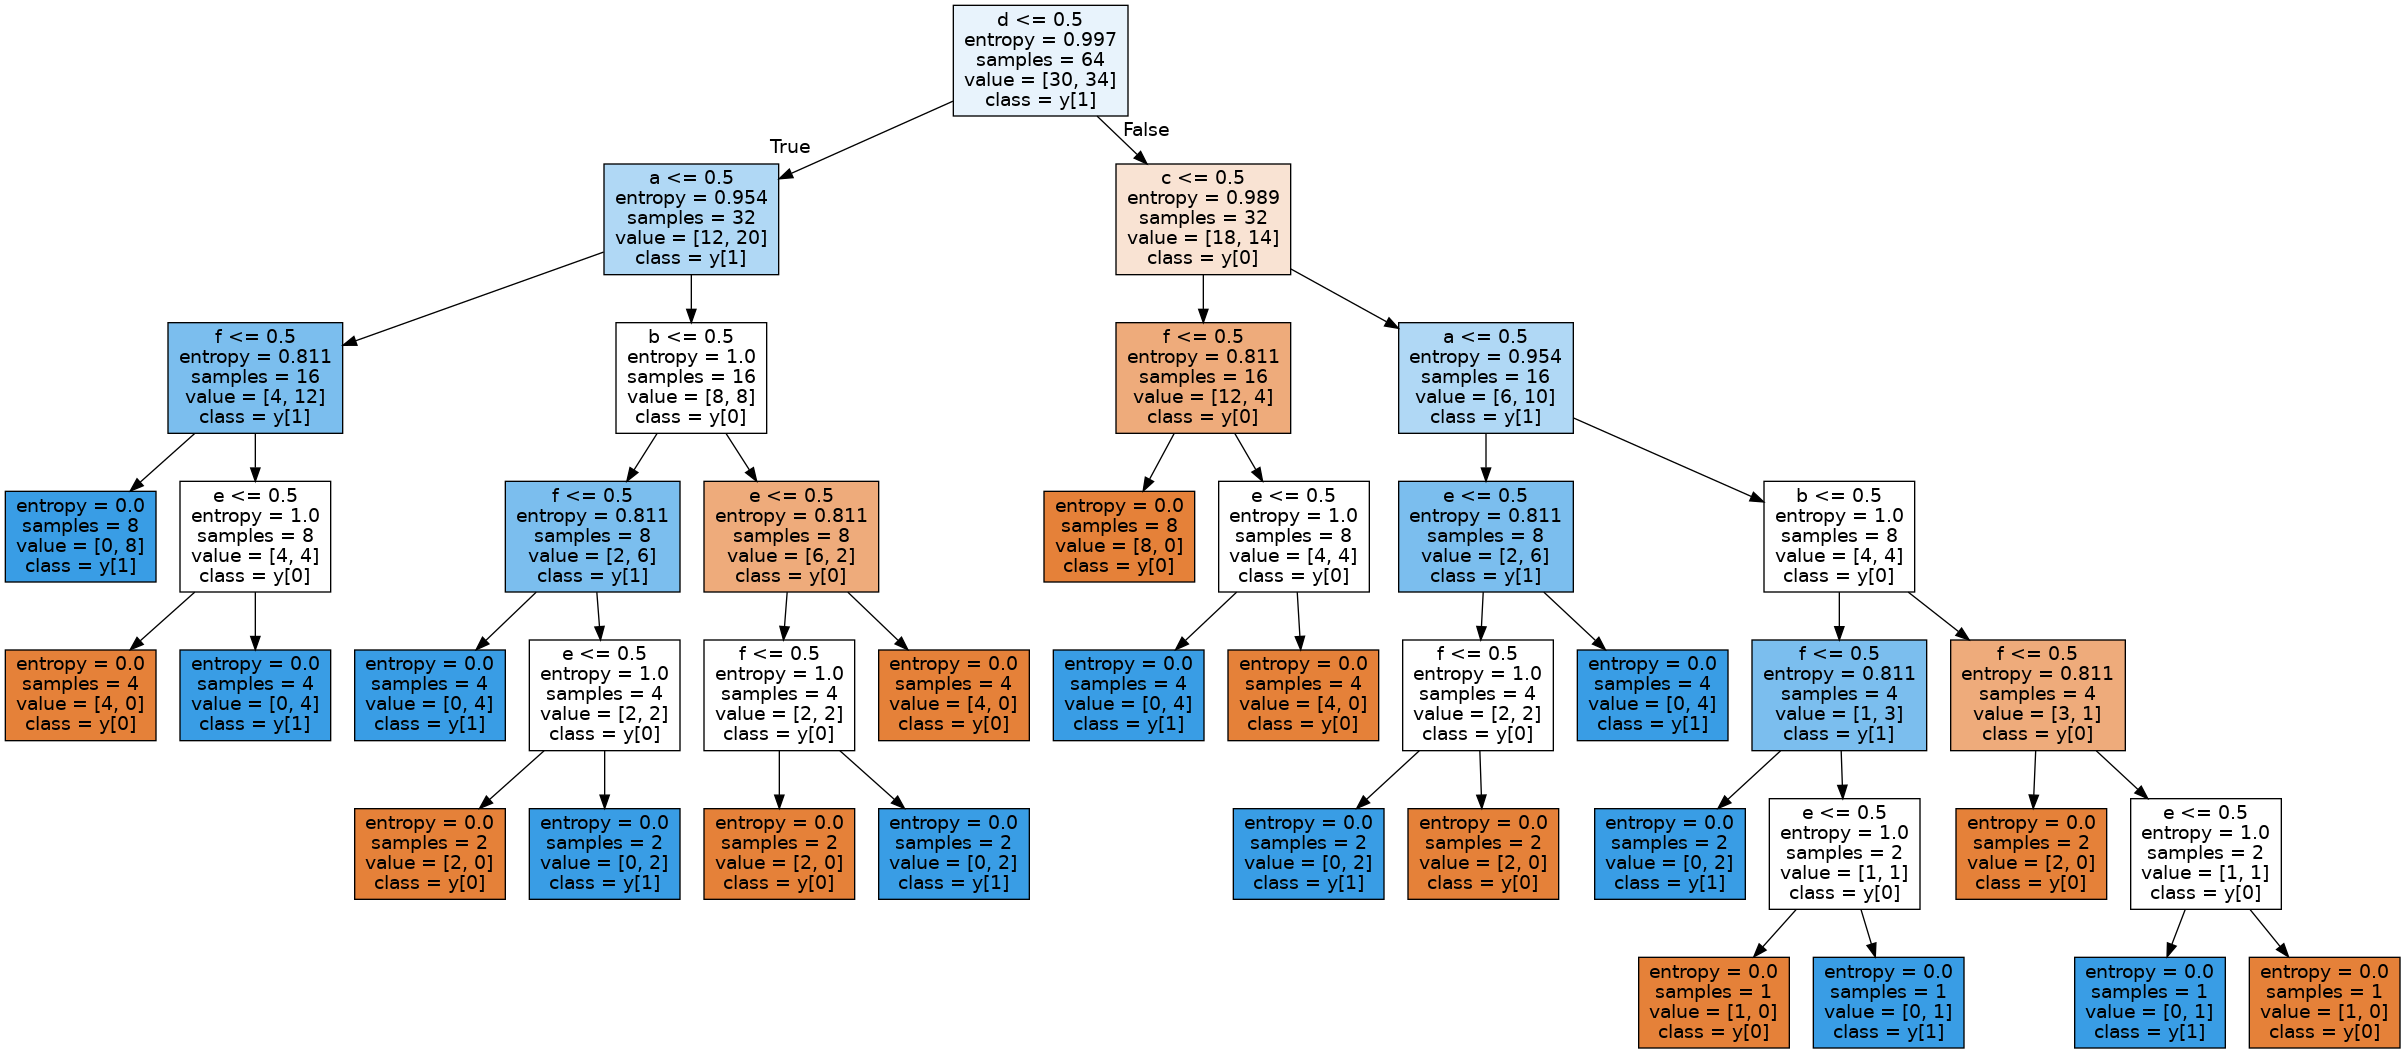

In [183]:
img = Image(filename='arbol_funcion.png')
display_png(img)

In [184]:
data.to_csv('tablaVerdad.csv',index=False)

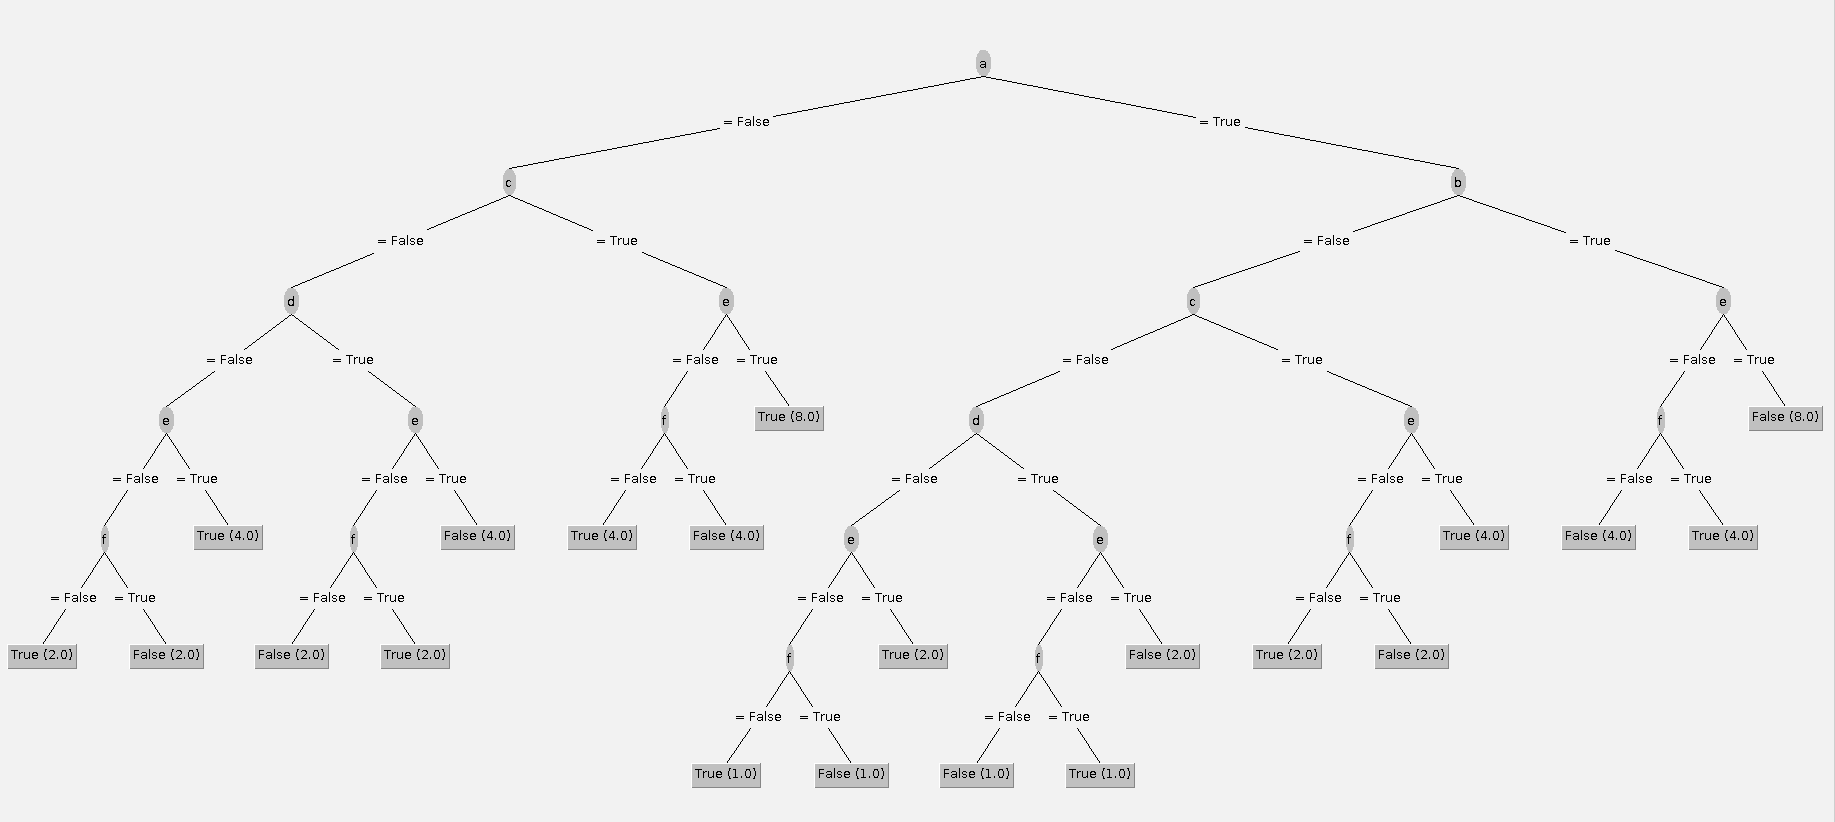

In [185]:
imgW = Image(filename='arbol_weka.png')
display_png(imgW)

# 2ºPARTE

In [186]:
df = pd.read_csv("Datos.csv")
df

,Riesgo,Historia,Deuda,Avales,Ingresos
0,alto,mala,alta,no,0 a 2M
1,alto,desconocida,alta,no,2 a 5M
2,moderado,desconocida,baja,no,2 a 5M
3,alto,desconocida,baja,no,0 a 2M
4,bajo,desconocida,baja,no,mas de 5M
5,bajo,desconocida,baja,adecuados,mas de 5M
6,alto,mala,baja,no,0 a 2M
7,moderado,mala,baja,adecuados,mas de 5M
8,bajo,buena,baja,no,mas de 5M
9,bajo,buena,alta,adecuados,mas de 5M


In [187]:
valores_nominales = {
    'Riesgo': {
        'alto': 2,
        'moderado': 1,
        'bajo': 0
    },
    'Historia': {
        'mala': 1,
        'desconocida': 0,
        'buena': 2
    },
    'Deuda': {
        'baja': 0,
        'alta': 1
    },
    'Avales': {
        'no': 0,
        'adecuados': 1
    },
    'Ingresos': {
        '0 a 2M': 0,
        '2 a 5M': 1,
        'mas de 5M': 2
    }
}


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> remplaza los valores nominales por enteros siguiendo el criterio del diccionario usado</div>

In [188]:
df = df.replace(valores_nominales)
df

,Riesgo,Historia,Deuda,Avales,Ingresos
0,2,1,1,0,0
1,2,0,1,0,1
2,1,0,0,0,1
3,2,0,0,0,0
4,0,0,0,0,2
5,0,0,0,1,2
6,2,1,0,0,0
7,1,1,0,1,2
8,0,2,0,0,2
9,0,2,1,1,2


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> se está entrenando un modelo de árbol de decisión de clasificación utilizando el conjunto de datos 'df'. El modelo se ajusta utilizando el constructor DecisionTreeClassifier con el criterio de selección de atributos 'entropy'.

Se utiliza el método fit para ajustar el modelo a los datos de entrenamiento, donde 'X' representa las variables predictoras o características, y 'y' representa la variable de respuesta o la clase a la que pertenece cada observación.

En este caso, las variables predictoras se seleccionan a partir de la segunda columna del DataFrame 'df' utilizando el método iloc de pandas. Además, se utiliza el método astype('int') para convertir las columnas seleccionadas a un tipo de datos entero antes de ajustar el modelo.

Este fragmento de código se utiliza para entrenar un modelo de árbol de decisión de clasificación que se puede utilizar para predecir la clase de nuevas observaciones basadas en sus características o atributos.</div>

In [189]:
clf2 =DecisionTreeClassifier(criterion='entropy')
clf2.fit(X=df.iloc[:,1:].astype('int'), y=df.iloc[:,0].astype('int'))

DecisionTreeClassifier(criterion='entropy')

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> se utiliza para evaluar el rendimiento del modelo de árbol de decisión de clasificación entrenado anteriormente utilizando el conjunto de datos 'df'.</div>

In [190]:
clf2.score(X=df.iloc[:,1:].astype('int'), y=df.iloc[:,0].astype('int'))

1.0

In [191]:
export_graphviz(clf2, out_file='treeDecisionCredito.dot', feature_names=df.columns[1:], filled=True, class_names=True)

In [192]:
!dot treeDecisionCredito.dot -Tpng -o arbol_credito_python.png

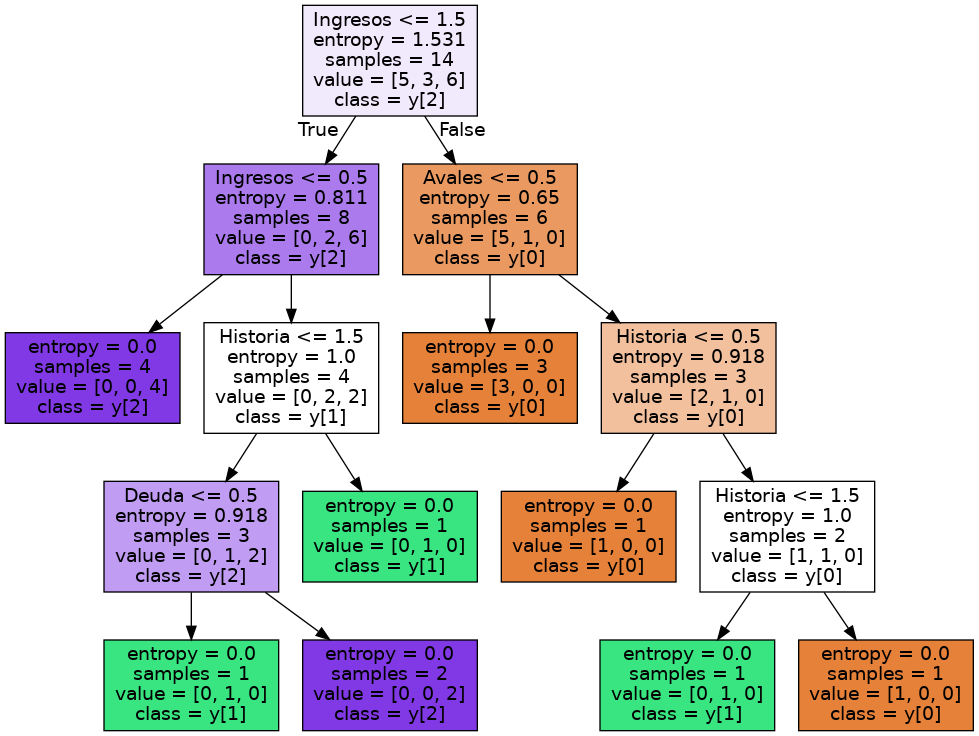

In [193]:
img2 = Image(filename='arbol_credito_python.png')
display_png(img2)

In [194]:
df.to_csv('tablaVerdadCredito.csv',index=False)

In [195]:
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [196]:
from id3 import Id3Estimator, export_graphviz

In [197]:
est = Id3Estimator()

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> se está ajustando un modelo de clasificación de árbol de decisión utilizando el objeto de la clase Id3Estimator creado anteriormente y el conjunto de datos 'df'.

Se utiliza el método fit del objeto Id3Estimator para ajustar el modelo de árbol de decisión a los datos de entrenamiento. La entrada 'X' representa las variables predictoras o características, y 'y' representa la variable de respuesta o la clase a la que pertenece cada observación.

En este caso, las variables predictoras se seleccionan a partir de la segunda columna del DataFrame 'df' utilizando el método iloc de pandas. Además, se utiliza el método astype('int') para convertir las columnas seleccionadas a un tipo de datos entero antes de ajustar el modelo.

Este fragmento de código se utiliza para entrenar un modelo de árbol de decisión de clasificación que se puede utilizar para predecir la clase de nuevas observaciones basadas en sus características o atributos.</div>

In [198]:
est.fit(df.iloc[:,1:].astype('int'), df.iloc[:,0].astype('int'))

Id3Estimator()

In [199]:
export_graphviz(est.tree_, 'credito_id3.dot', df.columns[1:])

<_io.TextIOWrapper name='credito_id3.dot' mode='w' encoding='utf8'>

In [200]:
!dot credito_id3.dot -Tpng -o arbol_credito_id3.png

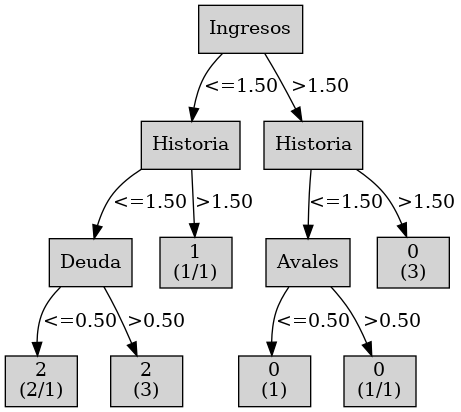

In [201]:
img3 = Image(filename='arbol_credito_id3.png')
display_png(img3)